In [1]:
import pandas as pd
import re
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn import linear_model
import seaborn as sns

<h2> data clean-up

In [2]:
df = pd.read_csv('../data/model_y_data.csv',sep=';')
print(len(df))
df.head()

262


,price,model_year,km,reg,fuel_type,fuel_economy,horse_power,gear_type,zip_code
0,579.800 kr.,2022,9000,2022-04-08,El,64.6,534,A,6670
1,509.500 kr.,2022,19000,2022-03-01,El,65.3,514,A,8381
2,575.000 kr.,2022,22000,2021-08-28,El,65.3,514,A,5750
3,579.900 kr.,2022,23000,2021-12-10,El,65.3,514,A,2970
4,504.900 kr.,2022,9000,2022-03-23,El,65.3,514,A,2100


In [3]:
#Cleans price and first regestration
df['price'] = df['price'].str.replace(r'\D','',regex=True)
df['price'] = df['price'].astype('int64')
df['reg'] = df['reg'].str.split('-').str[0]
df['reg'] = df['reg'].astype('int64')
df

,price,model_year,km,reg,fuel_type,fuel_economy,horse_power,gear_type,zip_code
0,579800,2022,9000,2022,El,64.6,534,A,6670
1,509500,2022,19000,2022,El,65.3,514,A,8381
2,575000,2022,22000,2021,El,65.3,514,A,5750
3,579900,2022,23000,2021,El,65.3,514,A,2970
4,504900,2022,9000,2022,El,65.3,514,A,2100
...,...,...,...,...,...,...,...,...,...
257,489900,2021,9900,2021,El,65.3,514,A,8766
258,539900,2021,14000,2021,El,65.3,514,A,9430
259,529000,2022,18000,2022,El,65.3,384,A,7800
260,509900,2021,28000,2021,El,65.3,514,A,8920


In [4]:
#selects target and features
X = df[['model_year', 'km','reg','fuel_economy','horse_power']]
y = df['price']

In [5]:
#Test train split of data, 33% test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state=42)

<h2> Linear Regression model

In [6]:
#fits model
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)

#degree of linear correlation between data and target
print(f'Regression score: {regr.score(X_train,y_train)}')

Regression score: 0.18328137715792403


In [7]:
#Test of 5 cars
print(f'Car 1: Predicted price: {regr.predict(X_test[0:1])[0].round(2)}kr - actual price: {y_test[0:1].values[0]}kr')
print(f'Car 2: Predicted price: {regr.predict(X_test[1:2])[0].round(2)}kr - actual price: {y_test[1:2].values[0]}kr')
print(f'Car 3: Predicted price: {regr.predict(X_test[2:3])[0].round(2)}kr - actual price: {y_test[2:3].values[0]}kr')
print(f'Car 4: Predicted price: {regr.predict(X_test[3:4])[0].round(2)}kr - actual price: {y_test[3:4].values[0]}kr')
print(f'Car 5: Predicted price: {regr.predict(X_test[4:5])[0].round(2)}kr - actual price: {y_test[4:5].values[0]}kr')

Car 1: Predicted price: 512531.94kr - actual price: 457800kr
Car 2: Predicted price: 501531.61kr - actual price: 489900kr
Car 3: Predicted price: 518062.33kr - actual price: 559500kr
Car 4: Predicted price: 530955.79kr - actual price: 499800kr
Car 5: Predicted price: 525697.77kr - actual price: 489700kr


In [8]:
#Method to get prediction score
def get_prediction_score(target,pred_target):
    score_list = []
    for num1,num2 in zip(target,pred_target):
        if num1 > num2:
            score_list.append(num2/num1*100)
        elif num2 > num1:
            score_list.append(num1/num2*100)
        else:
            score_list.append(100)
    return sum(score_list) / len(score_list)

In [9]:
#Test of prediction score
y_pred = regr.predict(X_test)
get_prediction_score(y_test,y_pred)

94.57900765666122

<h2> Decision tree regressor

In [10]:
#Fit and model score
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)
#predictions = model.predict(X_test)
dtr.score(X_test, y_test)

0.3743640277513882

In [11]:
#Test of 5 cars
print(f'Car 1: Predicted price: {dtr.predict(X_test[0:1])[0].round(2)}kr - actual price: {y_test[0:1].values[0]}kr')
print(f'Car 2: Predicted price: {dtr.predict(X_test[1:2])[0].round(2)}kr - actual price: {y_test[1:2].values[0]}kr')
print(f'Car 3: Predicted price: {dtr.predict(X_test[2:3])[0].round(2)}kr - actual price: {y_test[2:3].values[0]}kr')
print(f'Car 4: Predicted price: {dtr.predict(X_test[3:4])[0].round(2)}kr - actual price: {y_test[3:4].values[0]}kr')
print(f'Car 5: Predicted price: {dtr.predict(X_test[4:5])[0].round(2)}kr - actual price: {y_test[4:5].values[0]}kr')

Car 1: Predicted price: 509900.0kr - actual price: 457800kr
Car 2: Predicted price: 499900.0kr - actual price: 489900kr
Car 3: Predicted price: 499900.0kr - actual price: 559500kr
Car 4: Predicted price: 494000.0kr - actual price: 499800kr
Car 5: Predicted price: 504700.0kr - actual price: 489700kr


In [12]:
#Test of prediction score
y_pred = dtr.predict(X_test)
get_prediction_score(y_test,y_pred)

95.35291217373121

<h1>data visualization

,price,model_year,km,reg,fuel_economy,horse_power,zip_code
price,1.000000,0.281511,-0.407806,0.263832,0.055718,0.191379,0.027887
model_year,0.281511,1.000000,-0.478688,0.973142,-0.086808,-0.057126,0.016272
km,-0.407806,-0.478688,1.000000,-0.495202,0.098750,-0.004942,-0.068162
reg,0.263832,0.973142,-0.495202,1.000000,-0.087607,-0.060366,0.022188
fuel_economy,0.055718,-0.086808,0.098750,-0.087607,1.000000,0.153693,0.039970
horse_power,0.191379,-0.057126,-0.004942,-0.060366,0.153693,1.000000,-0.185940
zip_code,0.027887,0.016272,-0.068162,0.022188,0.039970,-0.185940,1.000000


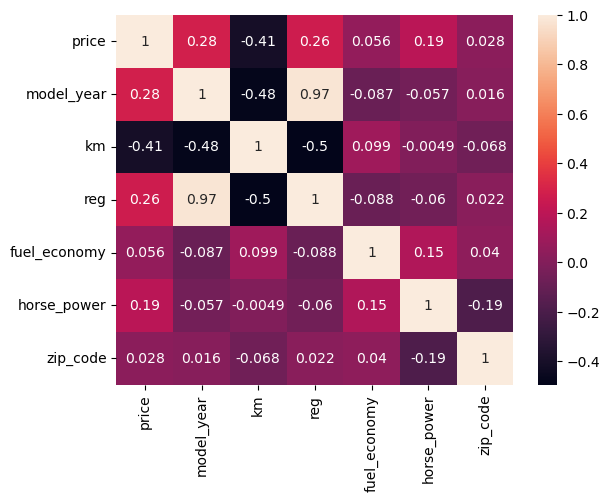

In [13]:
#Heatmap to show correlation between target and feautres
sns.heatmap(df.corr(), annot=True)
df.corr()

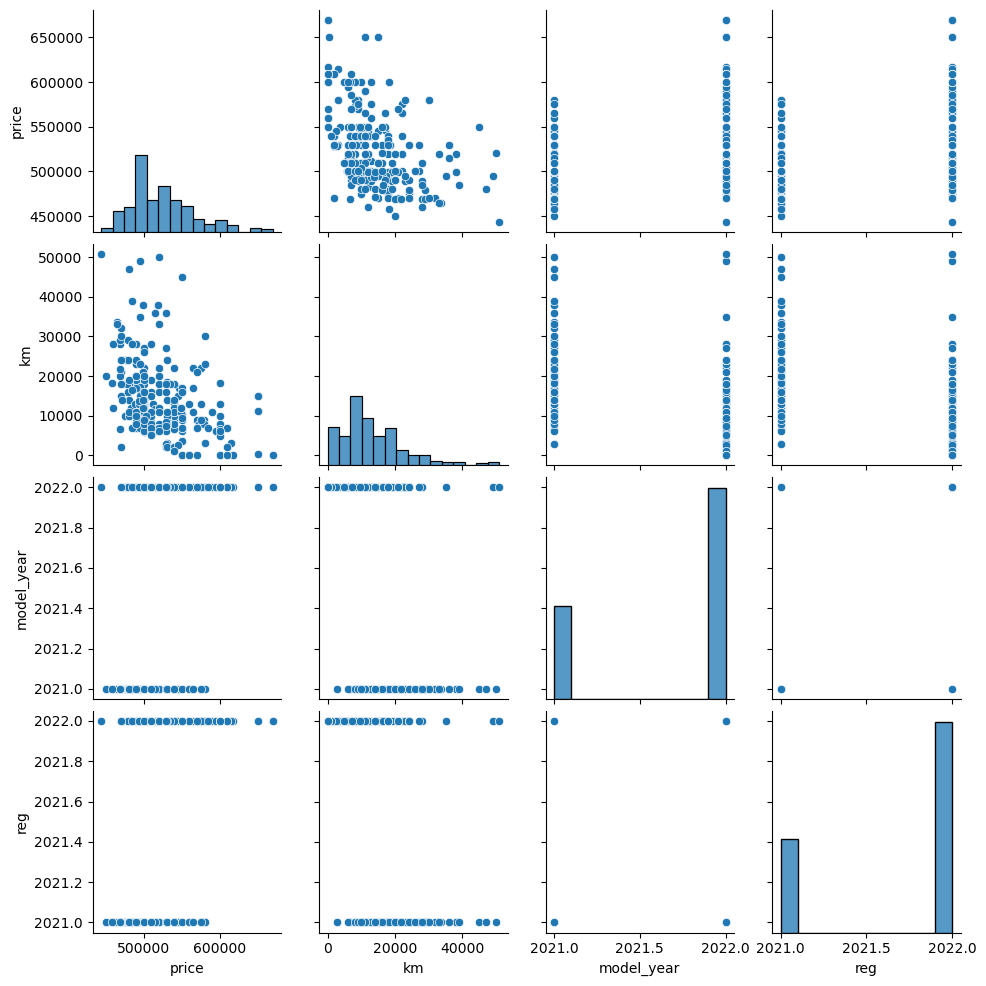

In [14]:
#Plots
sns.pairplot(df[['price','km','model_year','reg']])

<AxesSubplot:xlabel='price', ylabel='km'>

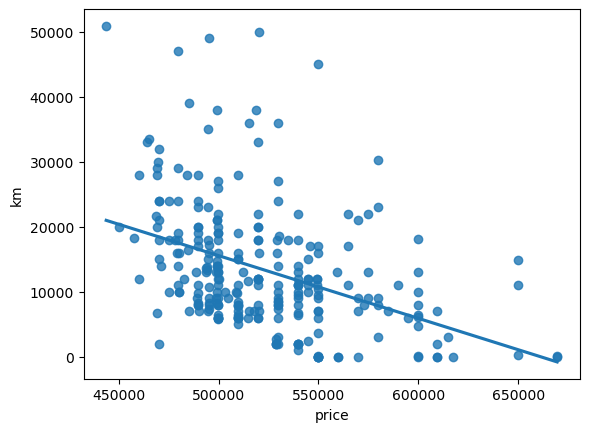

In [15]:
#regplot with price and model year
sns.regplot(x=df['price'], y=df['km'], ci=None)

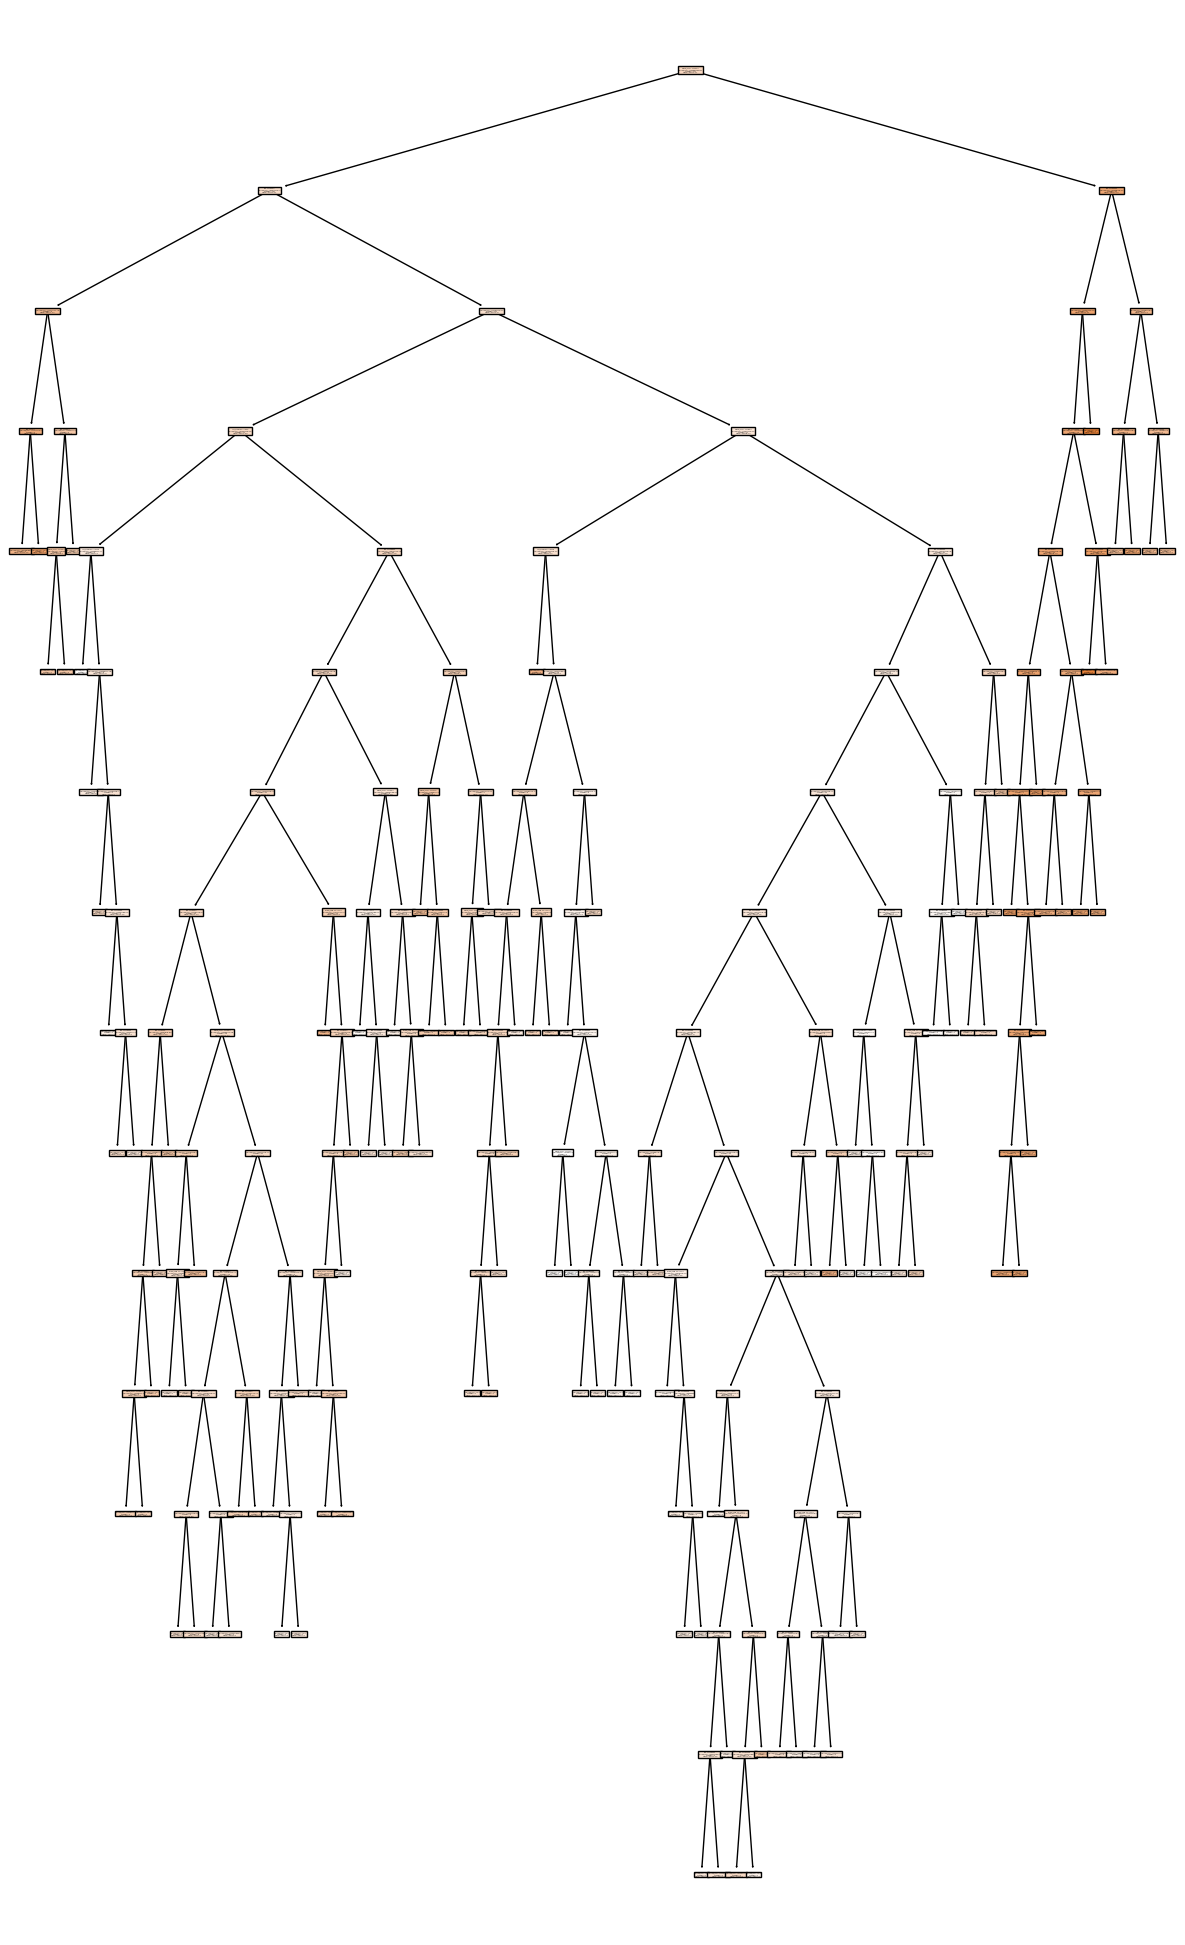

In [16]:
#map of the descision tree
fig = plt.figure(figsize=(15,25))
_= tree.plot_tree(dtr, feature_names=X.columns, filled=True)